In [6]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA

In [8]:
data= pd.read_csv('data.csv',encoding = 'ISO-8859-1')

In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
data.isnull().sum().sort_values(ascending =False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [23]:
data[data.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [27]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
data[(data['Quantity']<=0) | (data['UnitPrice']<0)].count()

InvoiceNo      10626
StockCode      10626
Description     9764
Quantity       10626
InvoiceDate    10626
UnitPrice      10626
CustomerID      8905
Country        10626
dtype: int64

In [29]:
data=data[data['Quantity']>0]

In [30]:
data=data[data['UnitPrice']>=0]

In [31]:
data.describe(include=[np.object])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,531283,531283,530691,531283,531283
unique,20726,3941,4077,19050,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2270,2327,1114,486284


In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
data['total_amount']=data['Quantity']*data['UnitPrice']

In [36]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [38]:
def toDtObject(value):
    return datetime.strptime(value,'%m/%d/%Y %H:%M')

In [39]:
data['InvoiceDate']=data['InvoiceDate'].apply(toDtObject)

In [40]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [42]:
def getMonth(value):
    return int(value.strftime('%m'))
def getDay(value):
    return int(value.strftime('%d'))
def getYear(value):
    return int(value.strftime('%Y'))
def getHour(value):
    return int(value.strftime('%H'))

In [43]:
data['month']=data['InvoiceDate'].apply(getMonth)
data['day']=data['InvoiceDate'].apply(getDay)
data['year']=data['InvoiceDate'].apply(getYear)
data['hour']=data['InvoiceDate'].apply(getHour)

In [44]:
data['year'].value_counts()

2011    489600
2010     41683
Name: year, dtype: int64

In [45]:
data.InvoiceDate.describe()

count                  531283
unique                  19050
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

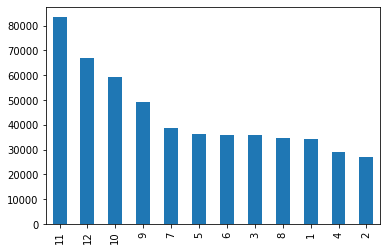

In [46]:
data.month.value_counts().plot(kind='bar')

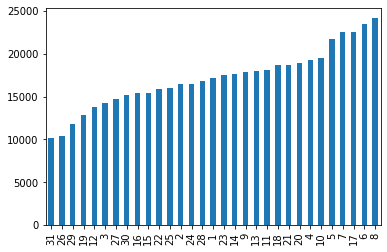

In [47]:
data.day.value_counts(ascending=True).plot(kind='bar')

In [48]:
data.Description.value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [49]:
data.groupby(['Description']).describe().transpose()

Description      4 PURPLE FLOCK DINNER CANDLES  \
Quantity count                       41.000000   
         mean                         3.512195   
         std                          3.834853   
         min                          1.000000   
         25%                          1.000000   
...                                        ...   
hour     min                          9.000000   
         25%                         12.000000   
         50%                         13.000000   
         75%                         14.000000   
         max                         16.000000   

Description      50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
Quantity count                      129.000000          179.000000   
         mean                        14.844961           13.715084   
         std                         35.162447           48.541102   
         min                          1.000000            1.000000   
         25%                          8.000000            1.000000   
...                                        ...                 ...   
hour     min                          8.000000            8.000000   
         25%                         12.000000           11.000000   
         50%                         13.000000           13.000000   
         75%                         15.000000           15.000000   
         max                         18.000000           19.000000   

Description      I LOVE LONDON MINI BACKPACK   I LOVE LONDON MINI RUCKSACK  \
Quantity count                     88.000000                           1.0   
         mean                       4.420455                           1.0   
         std                        8.270876                           NaN   
         min                        1.000000                           1.0   
         25%                        1.000000                           1.0   
...                                      ...                           ...   
hour     min                        8.000000                           9.0   
         25%                       11.000000                           9.0   
         50%                       12.000000                           9.0   
         75%                       14.000000                           9.0   
         max                       18.000000                           9.0   

Description      NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
Quantity count                 34.000000                   158.000000   
         mean                   1.735294                     1.506329   
         std                    1.286499                     1.927828   
         min                    1.000000                     1.000000   
         25%                    1.000000                     1.000000   
...                                  ...                          ...   
hour     min                    8.000000                     9.000000   
         25%                   11.000000                    12.000000   
         50%                   13.000000                    14.000000   
         75%                   14.000000                    15.750000   
         max                   20.000000                    20.000000   

Description      RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
Quantity count                105.000000                        279.000000   
         mean                  16.447619                          9.996416   
         std                   38.738269                         40.340859   
         min                    1.000000                          1.000000   
         25%                    6.000000                          1.000000   
...                                  ...                               ...   
hour     min                    8.000000                          8.000000   
         25%                   11.000000                         11.000000   
         50%                   13.000000  

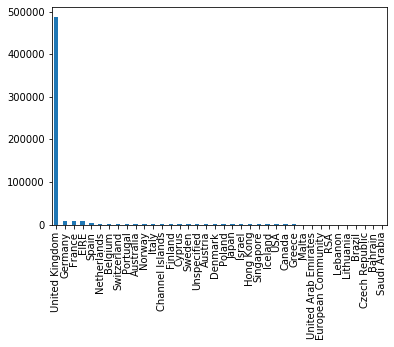

In [50]:
data.Country.value_counts().plot(kind='bar')

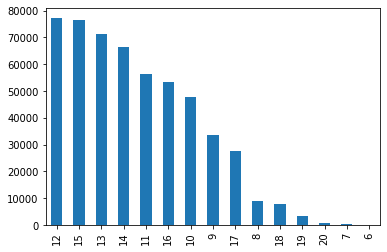

In [51]:
data['hour'].value_counts().plot(kind='bar')

In [52]:
data[data['month']==11].groupby(['Description']).sum().sort_values(by='total_amount',ascending=False)[:5]

,Quantity,UnitPrice,CustomerID,total_amount,month,day,year,hour
Description,,,,,,,,
DOTCOM POSTAGE,47,36905.40,56384.0,36905.40,517,830,94517,662
RABBIT NIGHT LIGHT,14954,1144.78,6943009.0,34556.72,5687,8089,1039687,6690
PAPER CHAIN KIT 50'S CHRISTMAS,7908,1309.74,5537731.0,28985.04,4466,6727,816466,5240
WHITE HANGING HEART T-LIGHT HOLDER,4944,884.06,3680261.0,14362.12,2959,4330,540959,3436
POPCORN HOLDER,12460,254.52,3271778.0,14195.60,2816,4306,514816,3281
